In [ ]:
!pip install gcsfs

In [27]:
import pandas as pd
import gcsfs
import matplotlib.pyplot as plt
import seaborn as sns

fs = gcsfs.GCSFileSystem(project='omina-gcp-resource')
with fs.open('omina-test-set/occupancy-data/occupancy_data.csv') as f:
    df = pd.read_csv(f)

In [6]:
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


Another way of readng data from gcs

In [8]:
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO

mybucket = storage.Bucket('omina-test-set')
data_csv = mybucket.object('occupancy-data/occupancy_data.csv')

uri = data_csv.uri
%gcs read --object $uri --variable data

df = pd.read_csv(BytesIO(data))
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [28]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']
del df['Unnamed: 0']
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [23]:
print (df.index.min())
print (df.index.max())

2015-02-02 14:19:00
2015-02-18 09:19:00


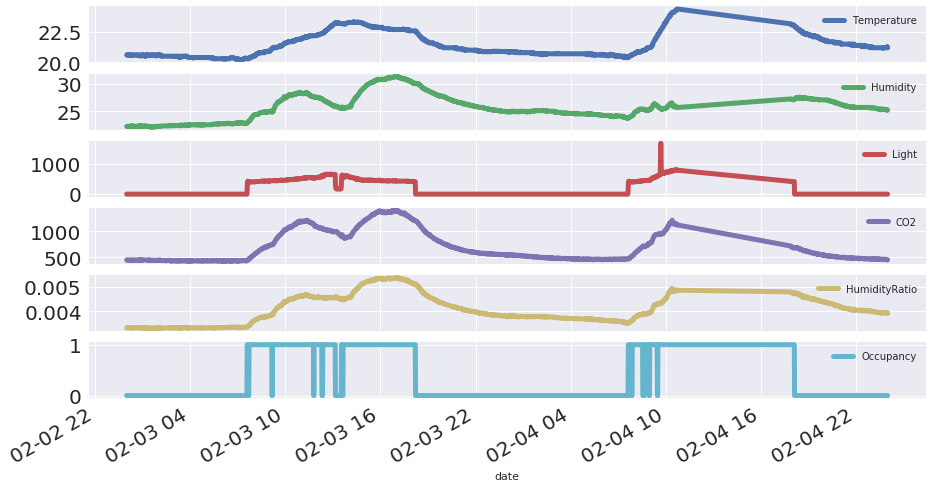

In [26]:
df['2015-02-03' : '2015-02-04'].plot(subplots=True, figsize=(15,8), linewidth=5, fontsize=20)
plt.legend(loc='best')

In [32]:
sns.pairplot(df, hue = 'Occupancy', vars = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], color = 'darkred', 
                     edgecolor = 'k')

TypeError: pairplot() got an unexpected keyword argument 'color'